In [138]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [112]:
data3_url="https://raw.githubusercontent.com/digipodium/Datasets/main/oil_dataset.csv"
df=pd.read_csv(data3_url)
df.head(25)

,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907
2,0.418,2013.507,82.748964
3,8.193,1420.607,84.760494
4,5.210,951.957,54.588671
5,11.189,1574.612,115.311020
6,11.657,1372.887,117.122617
7,11.895,1251.325,118.148288
8,4.879,153.332,57.391876
9,3.419,2142.666,83.430130


In [113]:
df.isnull().sum()
#df.notnull()

Mendacium    0
Depth        0
Price        0
dtype: int64

In [114]:
df.shape

(1000, 3)

In [115]:
df.dropna()

,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907
2,0.418,2013.507,82.748964
3,8.193,1420.607,84.760494
4,5.210,951.957,54.588671
...,...,...,...
995,1.755,247.752,51.477497
996,2.771,1609.462,73.971975
997,11.559,1943.008,123.883064
998,8.645,2250.942,116.879069


In [116]:
df.drop(['Mendacium'],axis=1,inplace=True)

In [117]:
df

,Depth,Price
0,1722.533,74.048691
1,2062.571,83.321907
2,2013.507,82.748964
3,1420.607,84.760494
4,951.957,54.588671
...,...,...
995,247.752,51.477497
996,1609.462,73.971975
997,1943.008,123.883064
998,2250.942,116.879069


In [118]:
df.shape

(1000, 2)

<AxesSubplot:xlabel='Depth', ylabel='Price'>

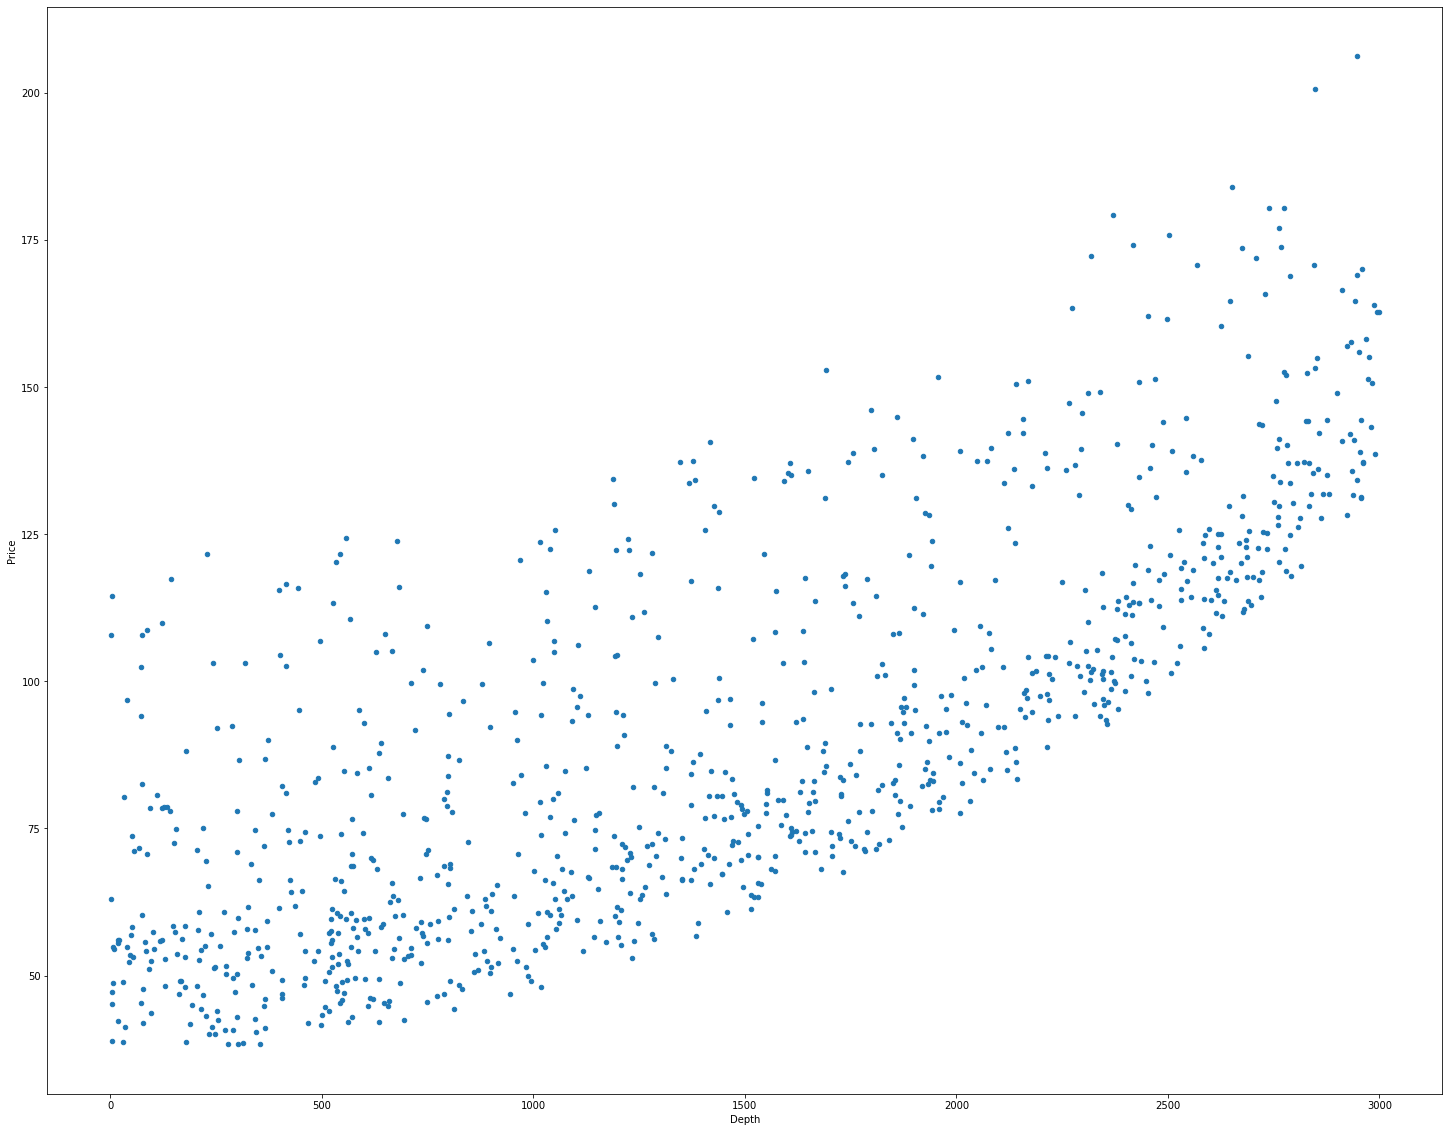

In [119]:
df.plot(x='Depth',y='Price',kind='scatter',figsize=(25,20))

In [120]:
x=df[['Depth']]
y=df[['Price']]

In [121]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=2)

In [122]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [123]:
score = reg.score(xtest,ytest) * 100
print(f'the depht of {score}% fot our model')

the depht of 59.228500561526644% fot our model


In [124]:
reg.predict(xtest)

array([[ 69.03027651],
       [ 99.8515223 ],
       [112.13022116],
       [ 66.60333684],
       [ 76.78569938],
       [ 58.32153726],
       [ 86.06200793],
       [ 78.52612634],
       [ 50.48720722],
       [119.05759757],
       [113.13932752],
       [102.97208474],
       [ 97.73208553],
       [ 59.71258451],
       [ 79.50101734],
       [118.57068895],
       [ 93.54675511],
       [116.96567239],
       [ 86.97302445],
       [104.61892008],
       [ 68.32176614],
       [107.64156681],
       [ 98.28371022],
       [ 78.4388322 ],
       [ 79.4192081 ],
       [ 56.78004691],
       [117.05935107],
       [128.87911724],
       [129.46524748],
       [ 52.95506602],
       [119.06044159],
       [118.86629338],
       [125.60703793],
       [ 80.90068372],
       [ 81.63766336],
       [ 55.08709775],
       [ 57.33683728],
       [ 96.56121802],
       [ 65.54196428],
       [ 77.0377438 ],
       [129.53393938],
       [ 57.64785168],
       [100.04079504],
       [105

In [125]:
df['prediction']=reg.predict(x)
df.head()

,Depth,Price,prediction
0,1722.533,74.048691,98.861337
1,2062.571,83.321907,108.729464
2,2013.507,82.748964,107.305595
3,1420.607,84.760494,90.099246
4,951.957,54.588671,76.498714


<AxesSubplot:xlabel='Depth', ylabel='Price'>

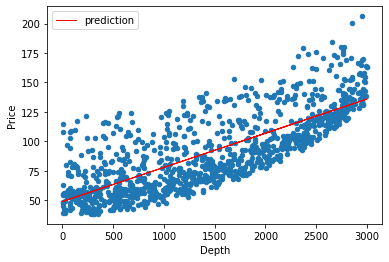

In [145]:
ax=df.plot(kind='scatter',x='Depth',y='Price')
df.plot(x='Depth',y='prediction',ax=ax,color='red',linewidth=1)


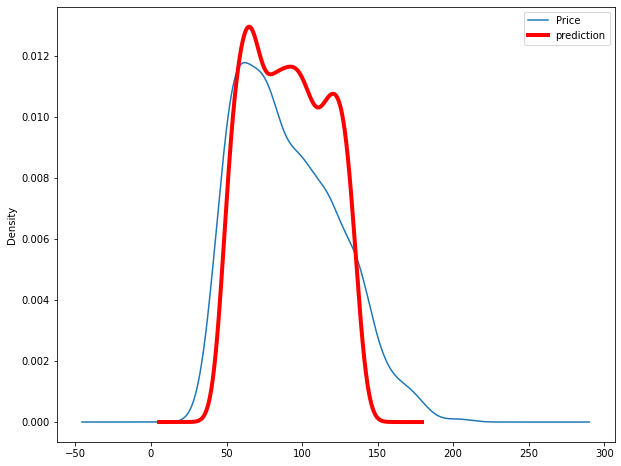

In [127]:
ax=df.plot(kind='kde',x='Depth',y='Price',figsize=(10,8))
df.plot(kind='kde',x='Depth',y='prediction',ax=ax,color='red',alpha=1,linewidth=4)#alpha use for tranprancey
plt.show()

In [128]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [129]:
r2_score(df.Price,df.prediction)

0.5816674122530434

In [130]:
mean_absolute_error(df.Price,df.prediction)

17.075568150623475

In [131]:
mean_squared_error(df.Price,df.prediction)

451.50356610143376

In [132]:
from joblib import dump

In [133]:
dump(reg,"Faltu_model_v3.pkl")

['Faltu_model_v3.pkl']

In [134]:
del x

In [135]:
from joblib import load


In [136]:
reg=load("Faltu_model_v3.pkl")

In [137]:
reg.predict([[15],[30]])

C:\Users\DELL\miniconda3\envs\digi12\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[49.30760449],
       [49.74291437]])